# Plot place

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np
sns.set_theme()

plt.rcParams["mathtext.fontset"] = "cm"

# Fig 1, vs Neal et al.

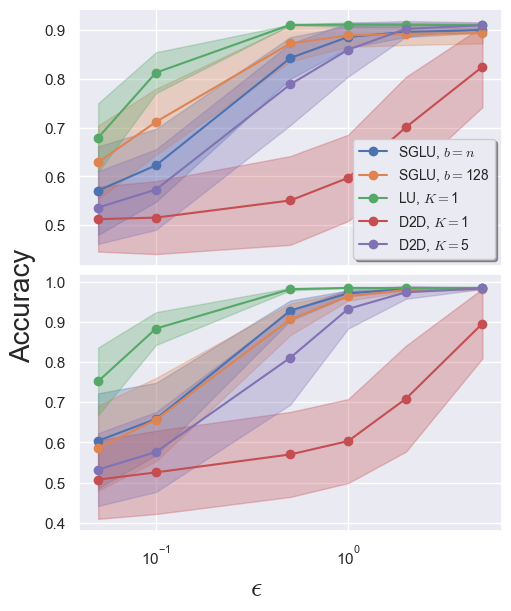

In [192]:
FS = 20
LFS = 10

eps = np.array([0.05,0.1,0.5,1,2,5])
SLU_dict = {}
D2D_dict = {}
LU_dict = {}
RT_dict = {}
K_list = np.array([1,2,5])

fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(5,6), sharex=True,layout='constrained')

for dataset in ['MNIST','CIFAR10']:
    for K in [1,2,5]:
        D2DResults = [[],[]]
        LUResults = [[],[]]
        for e in [0.05,0.1,0.5,1,2,5]:
            D2Dpath = f'../LMC/{dataset}/baseline/{K}/baseline_acc_unlearn_finetune{e}.npy'
            LUpath = f'../LMC/{dataset}/baseline/{K}/lmc_acc_unlearn_finetune{e}.npy'

            Result = np.load(D2Dpath)
            Mean, Std = Result.mean(), Result.std()
            D2DResults[0].append(Mean)
            D2DResults[1].append(Std)

            Result = np.load(LUpath)
            Mean, Std = Result.mean(), Result.std()
            LUResults[0].append(Mean)
            LUResults[1].append(Std)
            

        D2D_dict[f'{dataset}_{K}'] = np.array(D2DResults)
        LU_dict[f'{dataset}_{K}'] = np.array(LUResults)

for dataset in ['MNIST','CIFAR10']:
    for b in [0,128,256]:
        SLUResults = [[],[]]
        RTResults = [[],[]]
        for e in [0.05,0.1,0.5,1,2,5]:
            SLUpath = f'./{dataset}/baseline/1/sgd_acc_unlearn_finetune_b{b}_eps{e}.npy'

            Result = np.load(SLUpath)
            Mean, Std = Result.mean(), Result.std()
            SLUResults[0].append(Mean)
            SLUResults[1].append(Std)

            RTpath = f'./{dataset}/baseline/1/sgd_acc_unlearn_scratch_b{b}_eps{e}.npy'

            Result = np.load(RTpath)
            Mean, Std = Result.mean(), Result.std()
            RTResults[0].append(Mean)
            RTResults[1].append(Std)

        SLU_dict[f'{dataset}_{b}'] = np.array(SLUResults)
        RT_dict[f'{dataset}_{b}'] = np.array(RTResults)

d_counter = 0
for dataset in ['MNIST','CIFAR10']:
    counter = 0
    for b in [0,128]:
        if b==0:
            ax[d_counter].semilogx(eps,SLU_dict[f'{dataset}_{b}'][0],marker='o',label=f'SGLU, $b=n$', color=f'C{counter}')
            ax[d_counter].fill_between(eps, SLU_dict[f'{dataset}_{b}'][0]-SLU_dict[f'{dataset}_{b}'][1], SLU_dict[f'{dataset}_{b}'][0]+SLU_dict[f'{dataset}_{b}'][1], color=f'C{counter}', alpha=0.3)
            counter = counter + 1
        else:
            ax[d_counter].semilogx(eps,SLU_dict[f'{dataset}_{b}'][0],marker='o',label=f'SGLU, $b=${b}', color=f'C{counter}')
            ax[d_counter].fill_between(eps, SLU_dict[f'{dataset}_{b}'][0]-SLU_dict[f'{dataset}_{b}'][1], SLU_dict[f'{dataset}_{b}'][0]+SLU_dict[f'{dataset}_{b}'][1], color=f'C{counter}', alpha=0.3)
            counter = counter + 1
        
        # ax[d_counter].semilogx(eps,RT_dict[f'{dataset}_{b}'][0],marker='o',label=f'SGLU Retraining, b={b}', color=f'C{counter}')
        # ax[d_counter].fill_between(eps, RT_dict[f'{dataset}_{b}'][0]-RT_dict[f'{dataset}_{b}'][1], RT_dict[f'{dataset}_{b}'][0]+RT_dict[f'{dataset}_{b}'][1], color=f'C{counter}', alpha=0.3)
        # counter = counter + 1
        
    ax[d_counter].semilogx(eps,LU_dict[f'{dataset}_{1}'][0],marker='o',label=f'LU, $K=$1', color=f'C{counter}')
    ax[d_counter].fill_between(eps, LU_dict[f'{dataset}_{1}'][0]-LU_dict[f'{dataset}_{1}'][1], LU_dict[f'{dataset}_{1}'][0]+LU_dict[f'{dataset}_{1}'][1], color=f'C{counter}', alpha=0.3)
    counter = counter + 1
    
    
    for K in [1,5]:
        ax[d_counter].semilogx(eps,D2D_dict[f'{dataset}_{K}'][0],marker='o', color=f'C{counter}',label=f'D2D, $K=${K}')
        ax[d_counter].fill_between(eps, D2D_dict[f'{dataset}_{K}'][0]-D2D_dict[f'{dataset}_{K}'][1], D2D_dict[f'{dataset}_{K}'][0]+D2D_dict[f'{dataset}_{K}'][1], color=f'C{counter}', alpha=0.3)
        counter = counter + 1
    
    d_counter = d_counter + 1

ax[0].legend(shadow=True, loc='lower right',fontsize=LFS)
fig.supylabel('Accuracy', fontsize=FS)
fig.supxlabel('$\epsilon$', fontsize=FS)
# plt.tight_layout()
# plt.show()

plt.savefig('./Exp_Fig1.pdf')


# Fig 2-1, our own $\epsilon$ vs $K$ for different batch unlearning size $S$

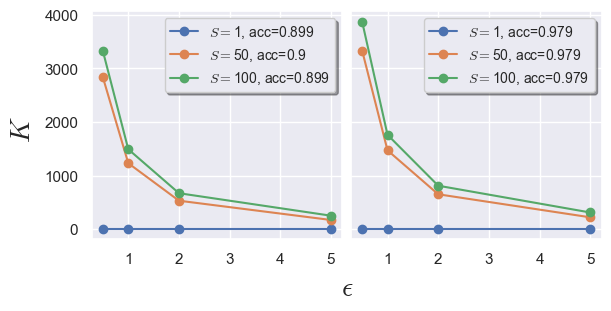

In [14]:
FS = 20
LFS = 10

eps = np.array([0.1,0.5,1.0,2.0,5.0])
LU_dict = {}
S_list = np.array([1,50,100])
K_dict = {}
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(6,3), sharex=True, sharey=True,layout='constrained')

for dataset in ['MNIST','CIFAR10']:
    temp = np.load(f'./{dataset}/paint_utility_epsilon/K_list.npy', allow_pickle = True)
    temp = eval(str(temp).split("array(")[0])
    for S in [1,50,100]:
        K_list = []
        LUResults = [[],[]]
        for e in [0.1,0.5,1,2,5]:
            K_list.append(temp[S][e])
            
            LUpath = f'./{dataset}/paint_utility_epsilon/{S}/acc_finetune_epsilon{e}.npy'

            Result = np.load(LUpath)
            Mean, Std = Result.mean(), Result.std()
            LUResults[0].append(Mean)
            LUResults[1].append(Std)

        LU_dict[f'{dataset}_{S}'] = np.array(LUResults)
        K_dict[f'{dataset}_{S}'] = K_list    
d_counter = 0
for dataset in ['MNIST','CIFAR10']:
    counter = 0
    for S in [1,50,100]:
        acc_mean, acc_std = np.round(LU_dict[f'{dataset}_{S}'][0].mean(),3), LU_dict[f'{dataset}_{S}'][1].std()
        ax[d_counter].plot(eps[1:],K_dict[f'{dataset}_{S}'][1:],marker='o',label=f'$S=${S}, acc={str(acc_mean)}')
        
        # for i, txt in enumerate(LU_dict[f'{dataset}_{S}'][0]):
        #     ax[d_counter].annotate(np.round(txt,3), (eps[i], K_dict[S][i]))
        
        # ax[d_counter].set_title(f'{dataset}', size=FS)
        ax[d_counter].legend(shadow=True, loc='upper right',fontsize=LFS)
        counter = counter + 1
    d_counter = d_counter + 1


fig.supylabel('       $K$', fontsize=FS)
fig.supxlabel('           $\epsilon$', fontsize=FS)


# plt.tight_layout()
# plt.show()

plt.savefig('./Exp_Fig2.pdf')

# Fig 2-2, our own $S$ vs Acc for different $\epsilon$, compared with retraining

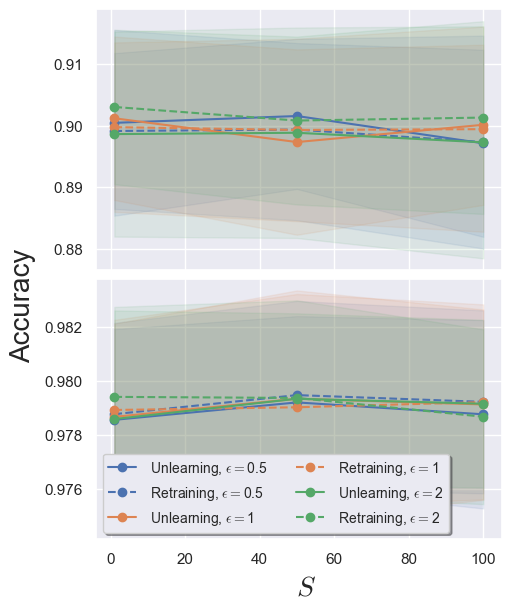

In [59]:
FS = 20
LFS = 10

eps = np.array([0.5,1.0,2.0])
LU_dict = {}
RT_dict = {}
S_list = np.array([1,50,100])
K_dict = {}
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(5,6), sharex=True,layout='constrained')


for dataset in ['MNIST','CIFAR10']:
    learn_scratch_list = np.load(f'./{dataset}/paint_utility_s/acc_scratch_D.npy', allow_pickle = True)
    for e in [0.5,1,2]:
        K_list = np.load(f'./{dataset}/paint_utility_s/{e}/K_list.npy', allow_pickle = True)
        LUResults = [[],[]]
        RTResults = [[],[]]
        for S in S_list:
            LUpath = f'./{dataset}/paint_utility_s/{e}/acc_finetune_remove{S}.npy'
            RTpath = f'./{dataset}/paint_utility_s/{e}/acc_scratch_Dnew_remove{S}.npy'

            Accs = np.load(LUpath)
            LUResults[0].append(Accs.mean())
            LUResults[1].append(Accs.std())

            Accs = np.load(RTpath)
            RTResults[0].append(Accs.mean())
            RTResults[1].append(Accs.std())

        LU_dict[f'{dataset}_{e}'] = np.array(LUResults)
        RT_dict[f'{dataset}_{e}'] = np.array(RTResults)
        K_dict[f'{dataset}_{e}'] = K_list

        
d_counter = 0
for dataset in ['MNIST','CIFAR10']:
    counter = 0
    for e in [0.5,1,2]:
        ax[d_counter].plot(S_list,LU_dict[f'{dataset}_{e}'][0],marker='o', color=f'C{counter}',label=f' Unlearning, $\epsilon=${e}')
        ax[d_counter].fill_between(S_list,LU_dict[f'{dataset}_{e}'][0]-LU_dict[f'{dataset}_{e}'][1], LU_dict[f'{dataset}_{e}'][0]+LU_dict[f'{dataset}_{e}'][1], color=f'C{counter}', alpha=0.1)
        ax[d_counter].plot(S_list,RT_dict[f'{dataset}_{e}'][0],marker='o', color=f'C{counter}',label=f' Retraining, $\epsilon=${e}', linestyle = '--')
        ax[d_counter].fill_between(S_list,RT_dict[f'{dataset}_{e}'][0]-RT_dict[f'{dataset}_{e}'][1], RT_dict[f'{dataset}_{e}'][0]+RT_dict[f'{dataset}_{e}'][1], color=f'C{counter}', alpha=0.1)
        # for i, txt in enumerate(K_dict[f'{dataset}_{e}']):
        #     if i >= 5:
        #         continue
        #     ax[d_counter].annotate(f'K={txt}', (S_list[i], LU_dict[f'{dataset}_{e}'][0][i]))
        
        # ax[d_counter].set_title(f'{dataset}', size=FS)

        counter = counter + 1
    d_counter = d_counter + 1

ax[1].legend(shadow=True, loc='lower left',fontsize=LFS,ncol=2)
fig.supylabel('Accuracy', fontsize=FS)
fig.supxlabel('             $S$', fontsize=FS)
# plt.tight_layout()
# plt.show()

plt.savefig('./Exp_Fig3.pdf')

# Fig 3, $\sigma$ vs $\epsilon_0$ and accuracy. Compare with retraining and initial learning

In [26]:
LU_dict[f'{dataset}_{b}'][0]

array([0.8507006 , 0.7408165 , 0.572248  , 0.51358366, 0.51990426,
       0.83581644, 0.72765124, 0.5783569 , 0.51303935, 0.50840724],
      dtype=float32)

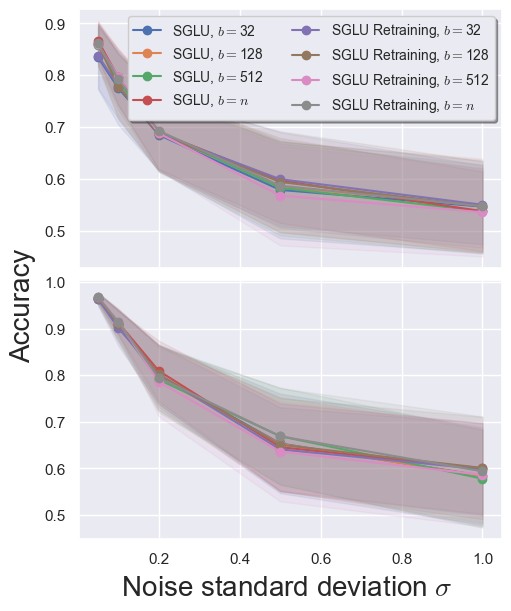

In [45]:
FS = 20
LFS = 10

sigma_list = [0.05, 0.1, 0.2, 0.5, 1]

SLL_dict = {}
SLU_dict = {}
SRT_dict = {}
epsilon0_dict = {}
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(5,6), sharex=True,layout='constrained')


for dataset in ['MNIST','CIFAR10']:
    for b in [0,32,64,128,256,512]:
        SLUResults = [[],[]]
        SLLResults = [[],[]]
        SRTResults = [[],[]]
        for sigma in sigma_list:
            SLUpath = f'./{dataset}/paint_unlearning_sigma/sgd_acc_finetune_b{b}_sigma{str(sigma)}_step100.npy'
            SLLpath = f'./{dataset}/paint_unlearning_sigma/sgd_acc_learn_scratch_b{b}_sigma{str(sigma)}.npy'
            SRTpath = f'./{dataset}/paint_unlearning_sigma/sgd_acc_unlearn_scratch_b{b}_sigma{str(sigma)}.npy'
            
            Accs = np.load(SLUpath)
            SLUResults[0].append(Accs.mean())
            SLUResults[1].append(Accs.std())

            Accs = np.load(SLLpath)
            SLLResults[0].append(Accs.mean())
            SLLResults[1].append(Accs.std())

            Accs = np.load(SRTpath)
            SRTResults[0].append(Accs.mean())
            SRTResults[1].append(Accs.std())

        SLU_dict[f'{dataset}_{b}'] = np.array(SLUResults)
        SLL_dict[f'{dataset}_{b}'] = np.array(SLLResults)
        SRT_dict[f'{dataset}_{b}'] = np.array(SRTResults)
    
    
#     LUResults = [[],[]]
#     for sigma in sigma_list:
#         LUpath = f'../LMC/{dataset}/paint_unlearning_sigma/{str(sigma)}_acc_finetune.npy'
#         Accs = np.load(LUpath)
#         LUResults[0].append(Accs.mean())
#         LUResults[1].append(Accs.std())
        
#     LU_dict[f'{dataset}'] = np.array(LUResults)
    
# Save needed K
K_dict = {}
for dataset in ['MNIST','CIFAR10']:
    for b in [0,32,64,128,256,512]:
        for sigma in sigma_list:
            temp = np.load(f'./{dataset}/paint_unlearning_sigma/k_list_b{b}_sigma{sigma}.npy',allow_pickle=True)
            K_dict[f'{dataset}_{b}_{sigma}'] = temp.sum()
            
# # Save needed K, LMC
# LU_K_dict = {}
# for dataset in ['MNIST','CIFAR10']:
#     for sigma in sigma_list:
#         temp = np.load(f'../LMC/{dataset}/paint_unlearning_sigma/K_dict{sigma}.npy',allow_pickle=True)
#         temp = eval(str(temp).split("array(")[0])
#         LU_K_dict[f'{dataset}_{sigma}'] = temp[100][1]

d_counter = 0
for dataset in ['MNIST','CIFAR10']:
    counter = 0
    for b in [32,128,512,0]:
        if b == 0:
            ax[d_counter].plot(sigma_list, SLU_dict[f'{dataset}_{b}'][0], marker='o', color=f'C{counter}',label=f'SGLU, $b=n$')
            ax[d_counter].fill_between(sigma_list, SLU_dict[f'{dataset}_{b}'][0]-SLU_dict[f'{dataset}_{b}'][1], SLU_dict[f'{dataset}_{b}'][0]+SLU_dict[f'{dataset}_{b}'][1], color=f'C{counter}', alpha=0.1)
            counter = counter + 1

            # ax[d_counter].plot(sigma_list, SLL_dict[f'{dataset}_{b}'][0], marker='o', color=f'C{counter}',label=f'Learning, b={b}')
            # ax[d_counter].fill_between(sigma_list, SLL_dict[f'{dataset}_{b}'][0]-SLL_dict[f'{dataset}_{b}'][1], SLL_dict[f'{dataset}_{b}'][0]+SLL_dict[f'{dataset}_{b}'][1], color=f'C{counter}', alpha=0.1)
            # counter = counter + 1

            # ax[d_counter].plot(sigma_list, SRT_dict[f'{dataset}_{b}'][0], marker='o', color=f'C{counter}',label=f'SGLU Retraining, $b=n$')
            # ax[d_counter].fill_between(sigma_list, SRT_dict[f'{dataset}_{b}'][0]-SRT_dict[f'{dataset}_{b}'][1], SRT_dict[f'{dataset}_{b}'][0]+SRT_dict[f'{dataset}_{b}'][1], color=f'C{counter}', alpha=0.1)
            # counter = counter + 1
        else:
            ax[d_counter].plot(sigma_list, SLU_dict[f'{dataset}_{b}'][0], marker='o', color=f'C{counter}',label=f'SGLU, $b=${b}')
            ax[d_counter].fill_between(sigma_list, SLU_dict[f'{dataset}_{b}'][0]-SLU_dict[f'{dataset}_{b}'][1], SLU_dict[f'{dataset}_{b}'][0]+SLU_dict[f'{dataset}_{b}'][1], color=f'C{counter}', alpha=0.1)
            counter = counter + 1

            # ax[d_counter].plot(sigma_list, SLL_dict[f'{dataset}_{b}'][0], marker='o', color=f'C{counter}',label=f'Learning, b={b}')
            # ax[d_counter].fill_between(sigma_list, SLL_dict[f'{dataset}_{b}'][0]-SLL_dict[f'{dataset}_{b}'][1], SLL_dict[f'{dataset}_{b}'][0]+SLL_dict[f'{dataset}_{b}'][1], color=f'C{counter}', alpha=0.1)
            # counter = counter + 1

            # ax[d_counter].plot(sigma_list, SRT_dict[f'{dataset}_{b}'][0], marker='o', color=f'C{counter}',label=f'SGLU Retraining, $b=${b}')
            # ax[d_counter].fill_between(sigma_list, SRT_dict[f'{dataset}_{b}'][0]-SRT_dict[f'{dataset}_{b}'][1], SRT_dict[f'{dataset}_{b}'][0]+SRT_dict[f'{dataset}_{b}'][1], color=f'C{counter}', alpha=0.1)
            # counter = counter + 1
            
    # Plot retraining here, maybe for b=n,128,32?
    for b in [32,128,512,0]:
        if b == 0:
            ax[d_counter].plot(sigma_list, SRT_dict[f'{dataset}_{b}'][0], marker='o', color=f'C{counter}',label=f'SGLU Retraining, $b=n$')
            ax[d_counter].fill_between(sigma_list, SRT_dict[f'{dataset}_{b}'][0]-SRT_dict[f'{dataset}_{b}'][1], SRT_dict[f'{dataset}_{b}'][0]+SRT_dict[f'{dataset}_{b}'][1], color=f'C{counter}', alpha=0.1)
            counter = counter + 1
        else:
            ax[d_counter].plot(sigma_list, SRT_dict[f'{dataset}_{b}'][0], marker='o', color=f'C{counter}',label=f'SGLU Retraining, $b=${b}')
            ax[d_counter].fill_between(sigma_list, SRT_dict[f'{dataset}_{b}'][0]-SRT_dict[f'{dataset}_{b}'][1], SRT_dict[f'{dataset}_{b}'][0]+SRT_dict[f'{dataset}_{b}'][1], color=f'C{counter}', alpha=0.1)
            counter = counter + 1
        
    # ax[d_counter].plot(sigma_list, LU_dict[f'{dataset}'][0], marker='o', color=f'C{counter}',label=f'LU, batch unlearning')
    # counter = counter + 1
    
    # for i, sigma in enumerate(sigma_list):
    #     if sigma == 0.05:
    #         y_offset = -0.2
    #     else:
    #         y_offset = 0.08
    #     for b in [0,128]:
    #         txt = K_dict[f'{dataset}_{b}_{sigma}']
    #         ax[d_counter].annotate(f'K={txt}', (sigma_list[i], SLU_dict[f'{dataset}_{0}'][0][i]+y_offset))
    #         y_offset = y_offset - 0.04
    #     txt = LU_K_dict[f'{dataset}_{sigma}']
    #     ax[d_counter].annotate(f'K={txt}', (sigma_list[i], SLU_dict[f'{dataset}_{0}'][0][i]+y_offset))
    
    # # slightly adjust x,y lim for display.
    # ax[d_counter].set_xlim(right=1.15)
    # if d_counter == 1:
    #     ax[d_counter].set_ylim(top=1.05)
    d_counter = d_counter + 1


###
ax[0].legend(shadow=True, loc='upper right',fontsize=LFS,ncol=2)
fig.supxlabel('        Noise standard deviation $\sigma$', fontsize=FS)
fig.supylabel('Accuracy', fontsize=FS)
# plt.tight_layout()
# plt.show()

plt.savefig('./Exp_Fig3.pdf')

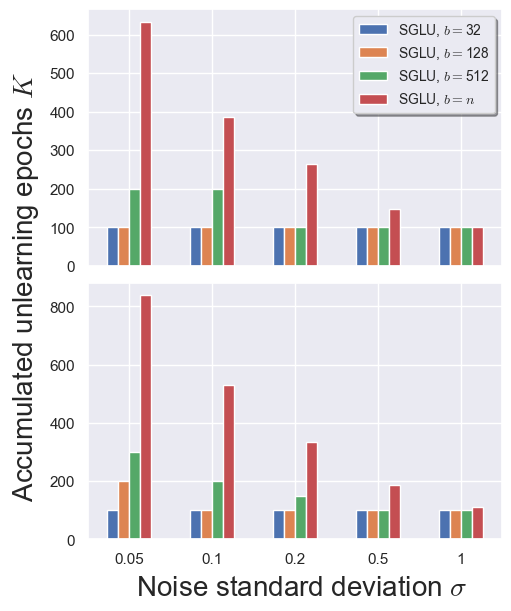

In [47]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(5,6), sharex=True,layout='constrained')

d_counter = 0
width = 0.2
for dataset in ['MNIST','CIFAR10']:
    for i, sigma in enumerate(sigma_list):
        counter = 0
        for b in [32,128,512,0]:
            txt = K_dict[f'{dataset}_{b}_{sigma}']
            offset = width * counter
            if b==0:
                rects = ax[d_counter].bar(1.5*i + offset, txt, width, color=f'C{counter}', label=f'SGLU, $b=n$')
            else:
                rects = ax[d_counter].bar(1.5*i + offset, txt, width, color=f'C{counter}', label=f'SGLU, $b=${b}')
            # ax[d_counter].bar_label(rects, padding=3)
            counter += 1
            
            
        # txt = LU_K_dict[f'{dataset}_{sigma}']
        # offset = width * counter
        # rects = ax[d_counter].bar(i + offset, txt, width, color=f'C{2*counter}', label=f'LU, batch unlearning')
        # ax[d_counter].bar_label(rects, padding=0)
        # counter += 1
        
        if d_counter==0 and i==0:
            ax[0].legend(shadow=True, loc='upper right',fontsize=LFS)
    
    ax[d_counter].set_xticks(1.5*np.arange(len(sigma_list)) + width*1.5, sigma_list)
    d_counter += 1
    
fig.supxlabel('            Noise standard deviation $\sigma$', fontsize=FS)
fig.supylabel('     Accumulated unlearning epochs $K$', fontsize=FS)
plt.savefig('./Exp_Fig4.pdf')

In [54]:
LU_K_dict[f'CIFAR10_0.05']

1541

# Fig 4, Sequential exp

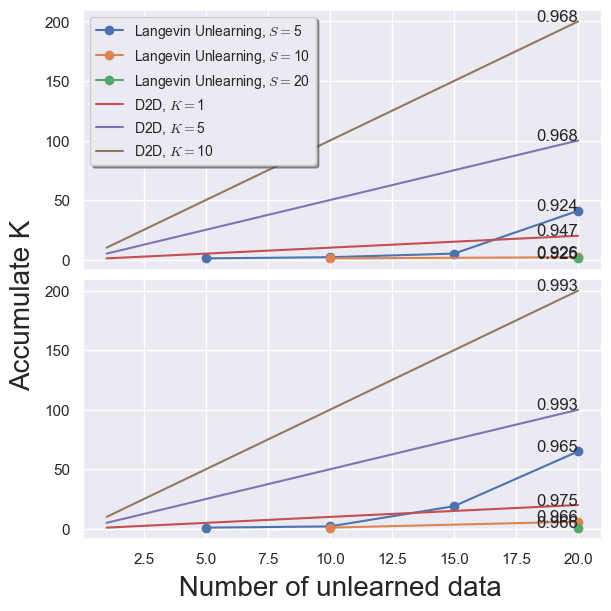

In [52]:
# Unlearn 100 points, eps = 1

FS = 20
LFS = 10

Max_nr = 20
D2D_dict = {}
LU_dict = {}
K_LU_dict = {}
K_D2D_list = np.array([1,5,10])
S_LU_list = np.array([5,10,20])


fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(6,6), sharex=True,layout='constrained')

for dataset in ['MNIST','CIFAR10']:
    # Baseline results
    for K in K_D2D_list:
        Max_step = int(Max_nr)
        D2DResults = [[],[]]
        for step in range(Max_step):
            D2Dpath = f'./{dataset}/sequential/baseline_acc_k_{K}_step_{step}.npy'

            Result = np.load(D2Dpath)
            Mean, Std = Result.mean(), Result.std()
            D2DResults[0].append(Mean)
            D2DResults[1].append(Std)
            
        D2D_dict[f'{dataset}_{K}'] = np.array(D2DResults)

    # Our results
    for S in S_LU_list:
        Max_step = int(Max_nr/S)
        LUResults = [[],[]]
        for step in range(Max_step):
            LUpath = f'./{dataset}/sequential/lmc_acc_finetune_nr{S}_step{step}.npy'

            Result = np.load(LUpath)
            Mean, Std = Result.mean(), Result.std()
            LUResults[0].append(Mean)
            LUResults[1].append(Std)
            
        LU_dict[f'{dataset}_{S}'] = np.array(LUResults)

        # Corresponding K
        K_LU_dict[f'{dataset}_{S}'] = np.load(f'./{dataset}/sequential/k_list_nr{S}.npy')
            

d_counter = 0
for dataset in ['MNIST','CIFAR10']:
    counter = 0
    for S in S_LU_list:
        Max_step = int(Max_nr/S)
        # number of current nr.
        x = np.linspace(0,Max_nr,Max_step+1)
        x = x[1:]
        # ax[d_counter].plot(x,LU_dict[f'{dataset}_{S}'][0],marker='o', color=f'C{counter}',label=f'Langevin Unlearning, $S=${S}')
        # ax[d_counter].fill_between(x, LU_dict[f'{dataset}_{S}'][0]-LU_dict[f'{dataset}_{S}'][1], LU_dict[f'{dataset}_{S}'][0]+LU_dict[f'{dataset}_{S}'][1], color=f'C{counter}', alpha=0.3)
        ax[d_counter].plot(x,np.cumsum(K_LU_dict[f'{dataset}_{S}'][1:Max_step+1]),marker='o', color=f'C{counter}',label=f'Langevin Unlearning, $S=${S}')

        # Annotate start and end acc
        # Acc = np.round(LU_dict[f'{dataset}_{S}'][0][0],3)
        # ax[d_counter].annotate(f'{str(Acc)}', (x[0], np.cumsum(K_LU_dict[f'{dataset}_{S}'][1:])[0]))
        Acc = np.round(LU_dict[f'{dataset}_{S}'][0][-1],3)
        ax[d_counter].annotate(f'{str(Acc)}', (x[-1], np.cumsum(K_LU_dict[f'{dataset}_{S}'][1:Max_step+1])[-1]), ha='right')
        # ax[d_counter,counter].semilogx(eps,RT_dict[f'{dataset}_{K}'][0],marker='o',label=f'Langevin Retraining')
        # ax[d_counter,counter].fill_between(eps, RT_dict[f'{dataset}_{K}'][0]-RT_dict[f'{dataset}_{K}'][1], RT_dict[f'{dataset}_{K}'][0]+RT_dict[f'{dataset}_{K}'][1], color='C1', alpha=0.3)
        
        counter = counter + 1

    for K in K_D2D_list:
        Max_step = Max_nr
        x = np.linspace(0,Max_nr,Max_step+1)
        x = x[1:]
        ax[d_counter].plot(x,x*K, color=f'C{counter}',label=f'D2D, $K=${K}')
        Acc = np.round(D2D_dict[f'{dataset}_{K}'][0][-1],3)
        ax[d_counter].annotate(f'{str(Acc)}', (x[-1], x[-1]*K), ha='right')
        counter = counter + 1
    d_counter = d_counter + 1

ax[0].legend(shadow=True, loc='upper left',fontsize=LFS)
# fig.supylabel('Accuracy', fontsize=FS)
fig.supylabel('Accumulate K', fontsize=FS)
fig.supxlabel('         Number of unlearned data', fontsize=FS)
# plt.tight_layout()
plt.show()

# New Sequential

In [30]:
A = np.load('./CIFAR10/sequential/k_list_b32.npy')
B = np.load('./CIFAR10/sequential/k_list_b128.npy')

print(A)
print(B)

[0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
[0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


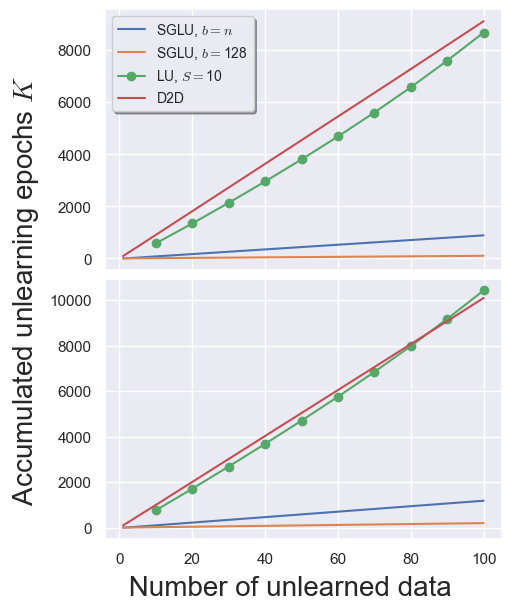

In [212]:
# Unlearn 100 points, eps = 1

FS = 20
LFS = 10

Max_nr = 100
SLU_dict = {}
K_SLU_dict = {}

D2D_dict = {}
K_D2D_dict = {}

LU_dict = {}
K_LU_dict = {}

fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(5,6), sharex=True,layout='constrained')

for dataset in ['MNIST','CIFAR10']:
        
    # Our results
    Max_step = int(Max_nr)
    for b in [0,32,64,128,256,512]:
        SLUResults = [[],[]]
        for step in range(1,Max_step+1):
            SLUpath = f'./{dataset}/sequential/sgd_acc_finetune_b{b}_step{step}.npy'

            Result = np.load(SLUpath)
            Mean, Std = Result.mean(), Result.std()
            SLUResults[0].append(Mean)
            SLUResults[1].append(Std)

        SLU_dict[f'{dataset}_{b}'] = np.array(SLUResults)

        # Corresponding K
        K_SLU_dict[f'{dataset}_{b}'] = np.load(f'./{dataset}/sequential/k_list_b{b}.npy')
    
    # D2D results
    Max_step = int(Max_nr)
    I = 1
    D2DResults = [[],[]]
    for step in range(1,Max_step+1):
        D2Dpath = f'../LMC/{dataset}/sequential2/baseline_acc_Ifac_{I}_step_{step}.npy'

        Result = np.load(D2Dpath)
        Mean, Std = Result.mean(), Result.std()
        D2DResults[0].append(Mean)
        D2DResults[1].append(Std)

    D2D_dict[f'{dataset}_{I}'] = np.array(D2DResults)
    K_D2D_dict[f'{dataset}_{I}'] = np.load(f'../LMC/{dataset}/sequential2/baseline_k_Ifac_{I}.npy')
    
    # LU results
    for S in np.array([5,10,20]):
        Max_step = int(Max_nr/S)
        LUResults = [[],[]]
        for step in range(Max_step):
            LUpath = f'../LMC/{dataset}/sequential2/lmc_acc_finetune_nr{S}_step{step}.npy'

            Result = np.load(LUpath)
            Mean, Std = Result.mean(), Result.std()
            LUResults[0].append(Mean)
            LUResults[1].append(Std)
            
        LU_dict[f'{dataset}_{S}'] = np.array(LUResults)

        # Corresponding K
        K_LU_dict[f'{dataset}_{S}'] = np.load(f'../LMC/{dataset}/sequential2/k_list_nr{S}.npy')
    

d_counter = 0
for dataset in ['MNIST','CIFAR10']:
    counter = 0
    for b in [0,128]:
        Max_step = int(Max_nr)
        # number of current nr.
        x = np.linspace(0,Max_nr,Max_step+1)
        x = x[1:]
        
        if b == 0:
            ax[d_counter].plot(x,np.cumsum(K_SLU_dict[f'{dataset}_{b}'])[1:], color=f'C{counter}',label=f'SGLU, $b=n$')
        else:
            ax[d_counter].plot(x,np.cumsum(K_SLU_dict[f'{dataset}_{b}'])[1:], color=f'C{counter}',label=f'SGLU, $b=${b}')

    
        # Acc = np.round(SLU_dict[f'{dataset}_{b}'][0][-1],3)
        # ax[d_counter].annotate(f'{str(Acc)}', (x[-1], np.cumsum(K_SLU_dict[f'{dataset}_{b}'][1:Max_step+1])[-1]), ha='right')
        counter = counter + 1
        
    # LU
    for S in np.array([10]):
        Max_step = int(Max_nr/S)
        x = np.linspace(0,Max_nr,Max_step+1)
        x = x[1:]
        ax[d_counter].plot(x,np.cumsum(K_LU_dict[f'{dataset}_{S}'])[1:],marker='o', color=f'C{counter}',label=f'LU, $S=${S}')
        # Acc = np.round(LU_dict[f'{dataset}_{S}'][0][-1],3)
        # ax[d_counter].annotate(f'{str(Acc)}', (x[-1], np.cumsum(K_LU_dict[f'{dataset}_{S}'][1:Max_step+1])[-1]), ha='right')
        counter = counter + 1
        
    # D2D
    Max_step = Max_nr
    x = np.linspace(0,Max_nr,Max_step+1)
    x = x[1:]
    ax[d_counter].plot(x,np.cumsum(K_D2D_dict[f'{dataset}_{I}']), color=f'C{counter}',label=f'D2D')
    
    # Acc = np.round(D2D_dict[f'{dataset}_{I}'][0][-1],3)
    # ax[d_counter].annotate(f'{str(Acc)}', (x[-1], np.cumsum(K_D2D_dict[f'{dataset}_{I}'])[-1]), ha='right')
    
    counter = counter + 1
    d_counter = d_counter + 1


ax[0].legend(shadow=True, loc='upper left',fontsize=LFS)
# fig.supylabel('Accuracy', fontsize=FS)
fig.supylabel('    Accumulated unlearning epochs $K$', fontsize=FS)
fig.supxlabel('         Number of unlearned data', fontsize=FS)
# plt.tight_layout()
# plt.show()

plt.savefig('./Exp_Fig2.pdf')

In [210]:
for dataset in ['MNIST','CIFAR10']:
    print(np.cumsum(K_D2D_dict[f'{dataset}_{I}'])[-1],np.cumsum(K_LU_dict[f'{dataset}_{10}'])[-1],np.cumsum(K_SLU_dict[f'{dataset}_{0}'])[-1],np.cumsum(K_SLU_dict[f'{dataset}_{128}'])[-1])

9118 8682 886 100
10098 10428 1183 200


Text(0.5, 0.01, '         Number of unlearned data')

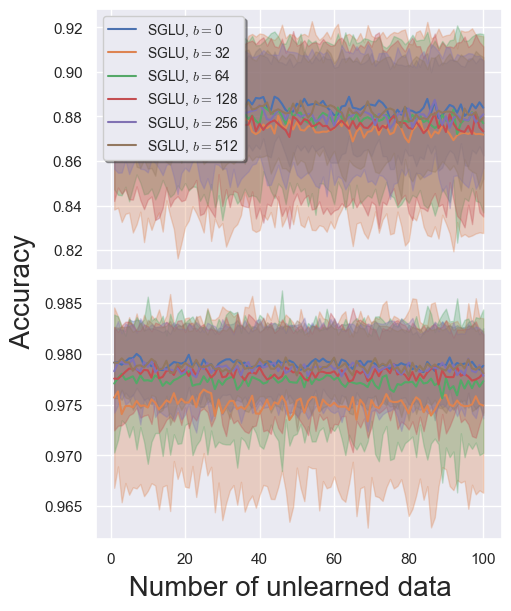

In [186]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(5,6), sharex=True,layout='constrained')

d_counter = 0
for dataset in ['MNIST','CIFAR10']:
    counter = 0
    for b in [0,32,64,128,256,512]:
        Max_step = int(Max_nr)
        # number of current nr.
        x = np.linspace(0,Max_nr,Max_step+1)
        x = x[1:]
        ax[d_counter].plot(x,SLU_dict[f'{dataset}_{b}'][0], color=f'C{counter}',label=f'SGLU, $b=${b}')
        ax[d_counter].fill_between(x, SLU_dict[f'{dataset}_{b}'][0]-SLU_dict[f'{dataset}_{b}'][1], SLU_dict[f'{dataset}_{b}'][0]+SLU_dict[f'{dataset}_{b}'][1], color=f'C{counter}', alpha=0.3)
        counter = counter + 1
    
#     # LU
#     for S in np.array([10,20]):
#         Max_step = int(Max_nr/S)
#         x = np.linspace(0,Max_nr,Max_step+1)
#         x = x[1:]
#         ax[d_counter].plot(x,LU_dict[f'{dataset}_{S}'][0], color=f'C{counter}',label=f'LU, $S=${S}')
#         ax[d_counter].fill_between(x, LU_dict[f'{dataset}_{S}'][0]-LU_dict[f'{dataset}_{S}'][1], LU_dict[f'{dataset}_{S}'][0]+LU_dict[f'{dataset}_{S}'][1], color=f'C{counter}', alpha=0.3)
#         counter = counter + 1
        
#     # D2D
#     Max_step = int(Max_nr)
#     # number of current nr.
#     x = np.linspace(0,Max_nr,Max_step+1)
#     x = x[1:]
#     ax[d_counter].plot(x,D2D_dict[f'{dataset}_{I}'][0], color=f'C{counter}',label=f'D2D')
#     ax[d_counter].fill_between(x, D2D_dict[f'{dataset}_{I}'][0]-D2D_dict[f'{dataset}_{I}'][1], D2D_dict[f'{dataset}_{I}'][0]+D2D_dict[f'{dataset}_{I}'][1], color=f'C{counter}', alpha=0.3)
#     counter = counter + 1

    d_counter = d_counter + 1


ax[0].legend(shadow=True, loc='upper left',fontsize=LFS)
# fig.supylabel('Accuracy', fontsize=FS)
fig.supylabel('    Accuracy', fontsize=FS)
fig.supxlabel('         Number of unlearned data', fontsize=FS)

Text(0.5, 0.01, '         Number of unlearned data')

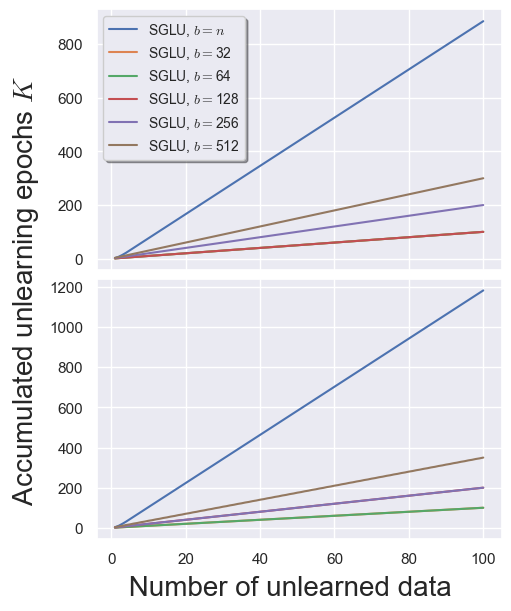

In [188]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(5,6), sharex=True,layout='constrained')

d_counter = 0
for dataset in ['MNIST','CIFAR10']:
    counter = 0
    for b in [0,32,64,128,256,512]:
        Max_step = int(Max_nr)
        # number of current nr.
        x = np.linspace(0,Max_nr,Max_step+1)
        x = x[1:]
        
        if b == 0:
            ax[d_counter].plot(x,np.cumsum(K_SLU_dict[f'{dataset}_{b}'])[1:], color=f'C{counter}',label=f'SGLU, $b=n$')
        else:
            ax[d_counter].plot(x,np.cumsum(K_SLU_dict[f'{dataset}_{b}'])[1:], color=f'C{counter}',label=f'SGLU, $b=${b}')

    
        # Acc = np.round(SLU_dict[f'{dataset}_{b}'][0][-1],3)
        # ax[d_counter].annotate(f'{str(Acc)}', (x[-1], np.cumsum(K_SLU_dict[f'{dataset}_{b}'][1:Max_step+1])[-1]), ha='right')
        counter = counter + 1
    
    # Acc = np.round(D2D_dict[f'{dataset}_{I}'][0][-1],3)
    # ax[d_counter].annotate(f'{str(Acc)}', (x[-1], np.cumsum(K_D2D_dict[f'{dataset}_{I}'])[-1]), ha='right')
    
    counter = counter + 1
    d_counter = d_counter + 1


ax[0].legend(shadow=True, loc='upper left',fontsize=LFS)
# fig.supylabel('Accuracy', fontsize=FS)
fig.supylabel('    Accumulated unlearning epochs $K$', fontsize=FS)
fig.supxlabel('         Number of unlearned data', fontsize=FS)

Text(0.5, 0.01, '         Number of unlearned data')

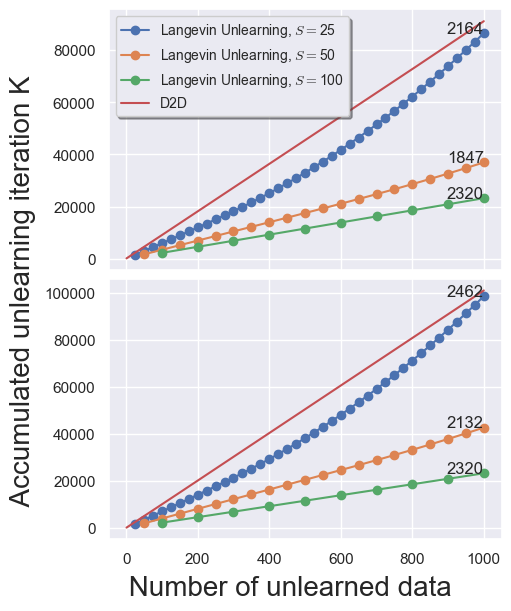

In [110]:
# temp plot

# Unlearn 100 points, eps = 1

FS = 20
LFS = 10

Max_nr = 1000
D2D_dict = {}
LU_dict = {}
K_LU_dict = {}
K_D2D_dict = {}
I_D2D_list = [1]
S_LU_list = np.array([25,50,100])


fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(5,6), sharex=True,layout='constrained')

for dataset in ['MNIST','CIFAR10']:
    # Baseline results
    for I in I_D2D_list:
        Max_step = int(Max_nr)
        K_D2D_dict[f'{dataset}_{I}'] = np.repeat(np.load(f'./{dataset}/sequential2/baseline_k_Ifac_{I}.npy'),10)
        
# Our results, only last step
dataset = 'CIFAR10'
for S in S_LU_list:
    Max_step = int(Max_nr/S)
    # Corresponding K
    if S == 20:
        K_LU_dict[f'{dataset}_{S}'] = np.array([0, 1540, 1680, 1683, 1685, 1686, 1689, 1692, 1698, 1708, 1726, 1752, 1790, 1838,
       1893, 1953, 2015, 2078, 2143, 2209, 2274, 2341, 2408, 2474, 2541, 2608, 2675, 2742,
       2808, 2876, 2942, 3009, 3076, 3142, 3209, 3276, 3342, 3409, 3476, 3542, 3609, 3675,
       3741, 3808, 3874, 3941, 4007, 4073, 4140, 4205, 4272])
    elif S == 25:
        K_LU_dict[f'{dataset}_{S}'] = np.array([0, 1633, 1771, 1774, 1775, 1776, 1777, 1779, 1783, 1790, 1803, 1823, 1853, 1895,
       1945, 2002, 2062, 2124, 2189, 2253, 2319, 2385, 2451, 2518, 2585, 2651, 2718, 2785,
       2852, 2918, 2986, 3052, 3119, 3185, 3252, 3319, 3385, 3452, 3518, 3585, 3651])
    elif S == 40:
        K_LU_dict[f'{dataset}_{S}'] = np.array([0, 1827, 1962, 1964, 1964, 1965, 1965, 1966, 1968, 1971, 1976, 1986, 2002, 2028,
       2065, 2111, 2166, 2224, 2286, 2349, 2413, 2478, 2544, 2610, 2676, 2743])
    elif S == 50:
        K_LU_dict[f'{dataset}_{S}'] = np.array([0, 1919, 2053, 2054, 2054, 2055, 2055, 2056, 2057, 2058, 2062, 2068, 2080, 2099,
       2128, 2168, 2218, 2273, 2333, 2395, 2459])
    elif S == 100:
        K_LU_dict[f'{dataset}_{S}'] = np.array([0, 2201, 2333, 2333, 2333, 2333, 2334, 2334, 2334, 2334, 2335])
        
dataset = 'MNIST'
for S in S_LU_list:
    Max_step = int(Max_nr/S)
    # Corresponding K
    if S == 20:
        K_LU_dict[f'{dataset}_{S}'] = np.array([0])
    elif S == 25:
        K_LU_dict[f'{dataset}_{S}'] = np.array([0, 1376, 1503, 1507, 1508, 1509, 1511, 1515, 1520, 1530, 1547, 1572, 1608, 1651,
           1702, 1756, 1812, 1870, 1928, 1988, 2047, 2107, 2167, 2228, 2288, 2348, 2409, 2469,
           2530, 2590, 2650, 2711, 2771, 2831, 2892, 2952, 3012, 3072, 3132, 3192, 3252])
    elif S == 40:
        K_LU_dict[f'{dataset}_{S}'] = np.array([0])
    elif S == 50:
        K_LU_dict[f'{dataset}_{S}'] = np.array([0, 1636, 1758, 1760, 1760, 1761, 1761, 1762, 1764, 1766, 1771, 1781, 1796, 1821,
           1855, 1898, 1948, 2001, 2057, 2114, 2172])
    elif S == 100:
        K_LU_dict[f'{dataset}_{S}'] = np.array([0, 2201, 2333, 2333, 2333, 2333, 2334, 2334, 2334, 2334, 2335])
            

d_counter = 0
for dataset in ['MNIST','CIFAR10']:
    counter = 0
    for S in S_LU_list:
        Max_step = int(Max_nr/S)
        # number of current nr.
        x = np.linspace(0,Max_nr,Max_step+1)
        x = x[1:]
        # ax[d_counter].plot(x,LU_dict[f'{dataset}_{S}'][0],marker='o', color=f'C{counter}',label=f'Langevin Unlearning, $S=${S}')
        # ax[d_counter].fill_between(x, LU_dict[f'{dataset}_{S}'][0]-LU_dict[f'{dataset}_{S}'][1], LU_dict[f'{dataset}_{S}'][0]+LU_dict[f'{dataset}_{S}'][1], color=f'C{counter}', alpha=0.3)
        ax[d_counter].plot(x,np.cumsum(K_LU_dict[f'{dataset}_{S}'])[1:],marker='o', color=f'C{counter}',label=f'Langevin Unlearning, $S=${S}')

        # # Annotate start and end acc
        # # Acc = np.round(LU_dict[f'{dataset}_{S}'][0][0],3)
        # # ax[d_counter].annotate(f'{str(Acc)}', (x[0], np.cumsum(K_LU_dict[f'{dataset}_{S}'][1:])[0]))
        Avg = np.mean(K_LU_dict[f'{dataset}_{S}'][1:])
        ax[d_counter].annotate(f'{str(int(Avg))}', (x[-1], np.cumsum(K_LU_dict[f'{dataset}_{S}'][1:Max_step+1])[-1]), ha='right')
        # # ax[d_counter,counter].semilogx(eps,RT_dict[f'{dataset}_{K}'][0],marker='o',label=f'Langevin Retraining')
        # # ax[d_counter,counter].fill_between(eps, RT_dict[f'{dataset}_{K}'][0]-RT_dict[f'{dataset}_{K}'][1], RT_dict[f'{dataset}_{K}'][0]+RT_dict[f'{dataset}_{K}'][1], color='C1', alpha=0.3)
        
        counter = counter + 1

    for I in I_D2D_list[:1]:
        Max_step = Max_nr
        x = np.linspace(0,Max_nr,Max_step+1)
        x = x[1:]
        ax[d_counter].plot(x,np.cumsum(K_D2D_dict[f'{dataset}_{I}']), color=f'C{counter}',label=f'D2D')
        # Avg = np.mean(K_D2D_dict[f'{dataset}_{I}'],0)
        # # Acc = np.round(D2D_dict[f'{dataset}_{I}'][0][-1],3)
        # ax[d_counter].annotate(f'{str(Avg)}', (x[-1], np.cumsum(K_D2D_dict[f'{dataset}_{I}'])[-1]), ha='right')
        counter = counter + 1
    d_counter = d_counter + 1

ax[0].legend(shadow=True, loc='upper left',fontsize=LFS)
# fig.supylabel('Accuracy', fontsize=FS)
fig.supylabel('    Accumulated unlearning iteration K', fontsize=FS)
fig.supxlabel('         Number of unlearned data', fontsize=FS)

In [30]:
import numpy as np
import math
from scipy.optimize import minimize_scalar

# Double check the sequential unlearning part

class Runner():
    def __init__(self):
        self.L = 0.261264
        self.m = 0.011264
        self.M = 1
        self.n = 11264
        self.eta = 1 / self.L
        self.delta = 1 / self.n
        self.sigma = 0.0125
    def epsilon_0(self,alpha,S,sigma):
        return (4 * alpha * S**2 * self.M**2) / (self.m * sigma**2 * self.n**2)
    def epsilon_s1(self, alpha, k, S, sigma):
        return math.exp(- (1/alpha) * self.eta * self.m * k) * (self.epsilon_0(alpha,S,sigma))
    def epsilon_s_with_alpha(self, alpha, S, sigma, step):
        # every time call this function, the k_list[step - 1], step > 1 must be greater than 0
        if step == 1:
            # the first step
            return math.exp(- (1/alpha) * self.eta * self.m * self.k_list[1]) * (self.epsilon_0(alpha,S,sigma))
        else:
            part1 = math.exp(- (1/alpha) * self.eta * self.m * self.k_list[step])
            step = step - 1
            part2 = self.epsilon_0(2*alpha - 1,S,sigma) + (alpha - 0.5) / (alpha - 1) * self.epsilon_s_with_alpha(2*alpha, S, sigma, step)
            return part1 * part2
        
    def compute_k(self,num_remove=1,num_remove_per_itr=1):
        num_step = int(num_remove/num_remove_per_itr)
        alpha_list = []
        self.k_list = np.zeros(num_step+1).astype(int)
        # first get k for step 1 as warm start
        k_1 = 1
        epsilon_of_s1 = lambda alpha: self.epsilon_s1(alpha, k_1, num_remove_per_itr, self.sigma)+np.log(self.n)/(alpha-1)
        min_epsilon_s1_k1 = minimize_scalar(epsilon_of_s1, bounds=(1, 100000), method='bounded')
        print(min_epsilon_s1_k1.fun)
        while min_epsilon_s1_k1.fun > 1.0:
            k_1 = k_1 + 1
            epsilon_of_s1 = lambda alpha: self.epsilon_s1(alpha, k_1, num_remove_per_itr, self.sigma)+np.log(self.n)/(alpha-1)
            min_epsilon_s1_k1 = minimize_scalar(epsilon_of_s1, bounds=(1, 100000), method='bounded')
        alpha_list.append(min_epsilon_s1_k1.x)
        # set k_1 in the list
        self.k_list[1] = k_1
        alpha_list.append(min_epsilon_s1_k1.x)
        for step in range(2,num_step+1):
            # here step start from 1. k_list[0] = 0 always
            self.k_list[step] = 1
            epsilon_of_sstep = lambda alpha: self.epsilon_s_with_alpha(alpha, num_remove_per_itr, self.sigma, step)+np.log(self.n)/(alpha-1)
            min_epsilon_sstep_kstep = minimize_scalar(epsilon_of_sstep, bounds=(1, 100000), method='bounded')
            while min_epsilon_sstep_kstep.fun > 1.0:
                self.k_list[step] = self.k_list[step] + 1
                epsilon_of_sstep = lambda alpha: self.epsilon_s_with_alpha(alpha, num_remove_per_itr, self.sigma, step)+np.log(self.n)/(alpha-1)
                min_epsilon_sstep_kstep = minimize_scalar(epsilon_of_sstep, bounds=(1, 100000), method='bounded')
            print(min_epsilon_sstep_kstep.fun)
            alpha_list.append(min_epsilon_s1_k1.x)
        # accumulate k
        accumulate_k = np.cumsum(self.k_list)
        print(accumulate_k)
        self.alpha_list = alpha_list
            
TEST = Runner()
TEST.compute_k()
print(TEST.k_list)
print(TEST.alpha_list)

0.8347340490691819
[0 1]
[0 1]
[23.821565895274112, 23.821565895274112]


In [18]:
import numpy as np
import math
from scipy.optimize import minimize_scalar

# Double check training from scratch needed iteration

class Runner():
    def __init__(self):
        self.L = 0.19470058990192413
        self.m = 0.011982
        self.M = 1
        self.n = 11982
        self.eta = 1 / self.L
        self.delta = 1 / self.n
        self.sigma = 0.001
        self.target_eps = 0.001
    def epsilon_0(self,alpha,S,sigma):
        return (alpha * 100 ** 2) / (2 * sigma**2)
    def epsilon_s1(self, alpha, k, S, sigma):
        return math.exp(- (1/alpha) * self.eta * self.m * k) * (self.epsilon_0(alpha,S,sigma))
        
    def compute_k(self,num_remove=1,num_remove_per_itr=1):
        num_step = int(num_remove/num_remove_per_itr)
        alpha_list = []
        self.k_list = np.zeros(num_step+1).astype(int)
        # first get k for step 1 as warm start
        k_1 = 1
        epsilon_of_s1 = lambda alpha: self.epsilon_s1(alpha, k_1, num_remove_per_itr, self.sigma)+np.log(self.n)/(alpha-1)
        min_epsilon_s1_k1 = minimize_scalar(epsilon_of_s1, bounds=(1, 100000), method='bounded')
        while min_epsilon_s1_k1.fun > self.target_eps:
            k_1 = k_1 + 100
            epsilon_of_s1 = lambda alpha: self.epsilon_s1(alpha, k_1, num_remove_per_itr, self.sigma)+np.log(self.n)/(alpha-1)
            min_epsilon_s1_k1 = minimize_scalar(epsilon_of_s1, bounds=(1, 100000), method='bounded')
        alpha_list.append(min_epsilon_s1_k1.x)
        # set k_1 in the list
        self.k_list[1] = k_1
        print(alpha_list)
        print(self.k_list)
            
TEST = Runner()
TEST.compute_k()

[9609.621053994424]
[      0 6589501]


In [ ]:
"""
CIFAR10

nr=1000, S=20, seq=50

[     0   1540   3220   4903   6588   8274   9963  11655  13353  15061
  16787  18539  20329  22167  24060  26013  28028  30106  32249  34458
  36732  39073  41481  43955  46496  49104  51779  54521  57329  60205
  63147  66156  69232  72374  75583  78859  82201  85610  89086  92628
  96237  99912 103653 107461 111335 115276 119283 123356 127496 131701
 135973]
[   0 1540 1680 1683 1685 1686 1689 1692 1698 1708 1726 1752 1790 1838
 1893 1953 2015 2078 2143 2209 2274 2341 2408 2474 2541 2608 2675 2742
 2808 2876 2942 3009 3076 3142 3209 3276 3342 3409 3476 3542 3609 3675
 3741 3808 3874 3941 4007 4073 4140 4205 4272]
 
nr=1000, S=25, seq=40 

[    0  1633  3404  5178  6953  8729 10506 12285 14068 15858 17661 19484
 21337 23232 25177 27179 29241 31365 33554 35807 38126 40511 42962 45480
 48065 50716 53434 56219 59071 61989 64975 68027 71146 74331 77583 80902
 84287 87739 91257 94842 98493]
[   0 1633 1771 1774 1775 1776 1777 1779 1783 1790 1803 1823 1853 1895
 1945 2002 2062 2124 2189 2253 2319 2385 2451 2518 2585 2651 2718 2785
 2852 2918 2986 3052 3119 3185 3252 3319 3385 3452 3518 3585 3651]

nr=1000, S=40, seq=25

[    0  1827  3789  5753  7717  9682 11647 13613 15581 17552 19528 21514
 23516 25544 27609 29720 31886 34110 36396 38745 41158 43636 46180 48790
 51466 54209]
[   0 1827 1962 1964 1964 1965 1965 1966 1968 1971 1976 1986 2002 2028
 2065 2111 2166 2224 2286 2349 2413 2478 2544 2610 2676 2743]
 
nr=1000, S=50, seq=20 
 
[    0  1636  3394  5154  6914  8675 10436 12198 13962 15728 17499 19280
 21076 22897 24752 26650 28598 30599 32656 34770 36942]
[   0 1636 1758 1760 1760 1761 1761 1762 1764 1766 1771 1781 1796 1821
 1855 1898 1948 2001 2057 2114 2172]

nr=1000, S=100, seq=10 

[    0  2201  4534  6867  9200 11533 13867 16201 18535 20869 23204]
[   0 2201 2333 2333 2333 2333 2334 2334 2334 2334 2335]

====

MNIST

nr=1000, S=20, seq=50
 
nr=1000, S=25, seq=40 

[    0  1376  2879  4386  5894  7403  8914 10429 11949 13479 15026 16598
 18206 19857 21559 23315 25127 26997 28925 30913 32960 35067 37234 39462
 41750 44098 46507 48976 51506 54096 56746 59457 62228 65059 67951 70903
 73915 76987 80119 83311 86563]
[   0 1376 1503 1507 1508 1509 1511 1515 1520 1530 1547 1572 1608 1651
 1702 1756 1812 1870 1928 1988 2047 2107 2167 2228 2288 2348 2409 2469
 2530 2590 2650 2711 2771 2831 2892 2952 3012 3072 3132 3192 3252]


nr=1000, S=40, seq=25
 
nr=1000, S=50, seq=20 

nr=1000, S=100, seq=10 

[    0  1892  3904  5916  7929  9942 11955 13968 15981 17995 20010]
[   0 1892 2012 2012 2013 2013 2013 2013 2013 2014 2015]

"""